In [56]:
__author__ = "Sumedha Biswas"

import sys
from astropy.io import ascii
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('dark_background')
from astropy.table import QTable, Table, Column
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
from astropy import time, coordinates as coord, units as u
from astropy.table import Table, hstack
from astropy.io import fits
from astropy.visualization import ZScaleInterval as zscale
from astropy.utils.data import get_pkg_data_filename
import warnings
from astropy.wcs import WCS, FITSFixedWarning
from astropy.visualization.wcsaxes import SphericalCircle



plt.rcParams['text.usetex'] = True

In [38]:
'''
Reading in List 1 (mainly from Paul's forced photometry routine)
'''

list1 = ascii.read('/users/sumedhabiswas/projects/gaiax_ml_stuff/list1/list1.csv')

In [39]:
'''
Reading in the GaiaX detections, converting the time to MJD
'''

all_gaia_data = ascii.read('/users/sumedhabiswas/projects/gaiax_ml_stuff/gaia_all_data.csv')
gaia_t = Time(all_gaia_data['ObsTime'])
all_gaia_data['ObsTime'] = gaia_t.mjd

In [40]:
ids = []
for i in range(0, len(list1)):
    ids = np.append(ids, list1[i]['OBJECT'].astype('str').zfill(5))

list1.add_column(ids, name='ML_ID')

list1.sort('ML_ID')

list1.columns

In [42]:
list1

RA,Dec,Name,SourceID,ObsTime,GMag,GMagErr,FILENAME,X_POS,Y_POS,MJD-OBS,DTIME,OBJECT,FILTER,EXPTIME,S-SEEING,AIRMASS,PC-ZPSTD,QC-FLAG,TQC-FLAG,MAG_OPT,MAGERR_OPT,SNR_OPT,LIMMAG_3SIGMA,MAG_ZOGY,MAGERR_ZOGY,SNR_ZOGY,TRANS_LIMMAG_3SIGMA,FLAGS_MASK,ML_ID
float64,float64,str14,int64,float64,float64,float64,str23,float64,float64,float64,float64,int64,str1,float64,float64,float64,float64,str6,str6,float64,float64,float64,float64,float64,float64,float64,float64,int64,str32
339.469951,-88.21044,GaiaX21-118592,6341325921842104832,59466.128541666665,19.81,0.01,ML1_20210909_030553_red,2074.8868671374885,4425.211446814334,59466.12909720094,0.013332822534721345,20,q,60.0,2.482858850193024,1.850399536605681,0.02991249268478514,yellow,yellow,19.52949244281416,0.08385672769770239,12.947514583112902,21.065807342529297,19.705608652287037,0.07667747139930725,8.217477798461914,20.63730812072754,0,00020
337.550001,-86.317213,GaiaX21-118536,6342115061953044992,59465.87966435185,19.89,0.04,ML1_20210908_210453_red,4190.130623921487,3289.697326569648,59465.87839238356,0.03052723902510479,38,q,60.0,3.219296060657502,1.686061934973311,0.02654795793632579,yellow,yellow,19.630391364743975,0.0930690241075161,11.665924459504966,21.125024795532227,20.096085283365003,0.11231525987386703,5.538722038269043,20.615203857421875,0,00038
307.085124,-74.795549,GaiaX21-118560,6372634309285338496,59465.96289351852,20.12,0.02,ML1_20210908_230323_red,7332.862089567421,8048.586874932066,59465.96068645158,0.052969606476835907,340,q,60.0,3.211437649822235,1.492069367395397,0.03193639895602494,orange,orange,19.78876553104363,0.11496044929019429,9.444432511023065,21.013389587402344,19.842164501107078,0.0939159095287323,7.175780773162842,20.55498695373535,0,00340
342.903408,-70.199231,GaiaX21-117403,6384320709139048064,59461.960439814815,19.52,0.0,ML1_20210904_225824_red,6628.324859485612,8421.271004816985,59461.95722723268,0.07710197131382301,569,q,60.0,2.085940701746941,1.267902624845705,0.01757541194697441,yellow,yellow,18.836119915844694,0.034335562634086346,31.62133139709421,21.401283264160156,19.826870348448278,0.07078033685684204,8.611924171447754,20.845643997192383,0,00569
306.256554,-64.118162,GaiaX21-118543,6429547195803220224,59465.897002314814,19.87,0.02,ML1_20210908_212832_red,5181.528615929324,4130.0553858759795,59465.89481629091,0.05246457376051694,936,q,60.0,3.061431590366364,1.222955457850163,0.01809762461650876,yellow,yellow,18.992245978223558,0.049381633438462004,21.98664015663117,21.113672256469727,19.770368461230813,0.08362090587615967,7.603064060211182,20.608291625976562,0,00936
306.256554,-64.118162,GaiaX21-118543,6429547195803220224,59465.897002314814,19.87,0.02,ML1_20210908_212713_red,5182.097029589301,4130.625988155742,59465.89390812062,0.07426066068001091,936,q,60.0,2.869558576011658,1.221635477982172,0.01735367621232497,yellow,yellow,19.040116403009463,0.04779421262977437,22.71689698433798,21.256145477294922,19.77095080076181,0.08034025132656097,8.043896675109863,20.652332305908203,0,00936
306.256554,-64.118162,GaiaX21-118543,6429547195803220224,59465.897002314814,19.87,0.02,ML1_20210908_212554_red,5182.344938817782,4126.240532732953,59465.89299753711,0.09611466497881338,936,q,60.0,3.536489339828492,1.220331354391004,0.01648543769034203,yellow,yellow,18.912943841131636,0.04608273282484334,23.560586323838976,21.170272827148438,19.629164273278356,0.07506668567657471,8.4723539352417,20.58426284790039,0,00936
303.769813,-47.770473,GaiaX21-118564,6669147993723640832,59465.98322916667,19.52,0.02,ML1_20210908_233000_red,9013.522777489645,2249.231407611446,59465.9791673899,0.09748264239169657,2254,q,60.0,3.154548243618012,1.434563844999175,0.02658138553428633,yellow,yellow,19.438450734872166,0.08515820582856462,12.749636916304556,20.927757263183594,19.5013500485447,0.08766689896583557,7.387989521026611,20.286470413208008,0,02254


/users/sumedhabiswas/projects/field_images/list1_images_v2/ML1_20210908_210453_red.fits.fz
ML RA 337.550001
ML Dec -86.317213
GOST RA 337.550001
GOST Dec -86.317213


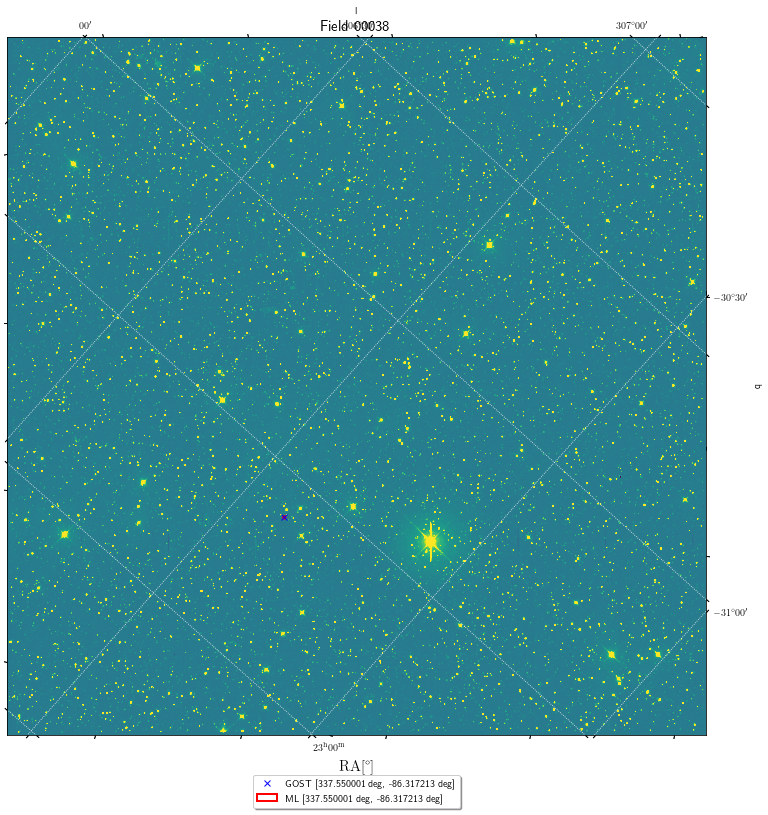

In [43]:
# /users/sumedhabiswas/projects/field_images/list1_images_v2

filename = get_pkg_data_filename('/users/sumedhabiswas/projects/field_images/list1_images_v2/ML1_20210908_210453_red.fits.fz')
print(filename)
hdu = fits.open(filename)

with warnings.catch_warnings():
            # Ignore a warning on using DATE-OBS in place of MJD-OBS
    warnings.filterwarnings('ignore', message="'datfix' made the change",
                                    category=FITSFixedWarning)
wcs = WCS(hdu[1].header)

image_data = fits.getdata(filename, ext=1)
zscale = ZScaleInterval()
vmin, vmax = zscale.get_limits(image_data)

scale = 0.56 # arcsec / pix for ML/BG

color_map = plt.cm.get_cmap('gray')
reversed_color_map = color_map.reversed()

plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs)
im = ax.imshow(image_data, cmap=plt.cm.viridis, vmin=vmin, vmax=vmax, origin='lower') #cmap=plt.cm.viridis #cmap=reversed_color_map

ra, dec = 337.550001, -86.317213
print('ML RA', ra)
print('ML Dec', dec)
    
ra_g, dec_g = 337.550001,-86.317213
print('GOST RA', ra_g)
print('GOST Dec', dec_g)

ax.plot_coord(SkyCoord(ra_g*u.degree, dec_g*u.degree, frame='fk5'), "x", color='b',label=f'GOST [{ra_g*u.degree}, {dec_g*u.degree}]')
    
r = SphericalCircle((ra*u.deg,  dec*u.deg), 10* u.arcsec, edgecolor='red', facecolor='none', linestyle='solid', linewidth=2,transform=ax.get_transform('fk5'), label=f'ML [{ra*u.deg}, {dec*u.deg}]')

plt.tight_layout()
ax.add_patch(r)
# plt.xlim(4000,5000)
# plt.ylim(3000,4000)

plt.title('Field 00038', fontsize=15)
plt.xlabel(r'$\mathrm{RA [{^\circ}]}$', fontsize=15)
plt.ylabel(r'$\mathrm{Dec [{^\circ}]}$', fontsize=15)
    # plt.legend(bbox_to_anchor=(1.04, 0.5), loc="lower right", borderaxespad=0)
plt.subplots_adjust(top=03.9)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)
# plt.tight_layout(pad=2.0, h_pad=2.0)
# plt.savefig('/users/sumedhabiswas/projects/gaiax_ml_stuff/field_images/transient_fields/list3_1arcmin/'+list3[i]['ML_ID_1']+'.png', bbox_inches='tight', pad_inches=0.5, facecolor='white', edgecolor='black')
overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='white', ls='dotted')
# plt.text(337.55, 337.56, '0.1 deg', color='white', rotation=90, transform=ax.get_transform('icrs'))


plt.show()
plt.clf()
plt.close()

In [103]:
def show_thumbs(data_row):
        
    fig=plt.figure(figsize=(16,7))
    ncols, nrows = 4, 1
    fields2show = ['THUMBNAIL_RED', 'THUMBNAIL_REF',
                   'THUMBNAIL_D', 'THUMBNAIL_SCORR']
    for ip in range (len(fields2show)):
        data = data_row[fields2show[ip]]
        vmin, vmax = zscale().get_limits(data)
        fig.add_subplot(nrows, ncols, ip+1)
        # plt.subplots_adjust(hspace=0.1)
        plt.imshow(data, vmin=vmin, vmax=vmax,
                   interpolation='none', cmap='gist_heat',
                   origin='lower')
        plt.xlabel('New Reference')
        # plt.suptitle("GaiaX21-118536 in Field 00038", fontsize=18) #, y=0.95)

    plt.show()
    plt.close()

In [157]:
# 00020

table0 = Table.read(

# 00038 #84

table = Table.read('/users/sumedhabiswas/projects/field_images/list1_images_v2/trans/00038/ML1_20210908_225039_red_trans.fits')

# table.columns

# 00340 #964

table1 = Table.read('/users/sumedhabiswas/projects/field_images/list1_images_v2/trans/00340/ML1_20210908_211207_red_trans.fits')

# 00569 #62

table2 = Table.read('/users/sumedhabiswas/projects/field_images/list1_images_v2/trans/00569/ML1_20210904_211044_red_trans.fits')


# 00936 #55

table3 = Table.read('/users/sumedhabiswas/projects/field_images/list1_images_v2/trans/00936/ML1_20210908_212554_red_trans.fits')

# 02254 #35

table4 = Table.read('/users/sumedhabiswas/projects/field_images/list1_images_v2/trans/02254/ML1_20210908_233000_red_trans.fits')


In [158]:
len(table4)

419

In [159]:
table4.pprint(max_lines=-1, max_width=-1)

NUMBER X_PEAK Y_PEAK      RA_PEAK             DEC_PEAK        SNR_ZOGY  E_FLUX_ZOGY E_FLUXERR_ZOGY  MAG_ZOGY  MAGERR_ZOGY  X_POS_SCORR Y_POS_SCORR      RA_SCORR           DEC_SCORR      ELONG_SCORR FLAGS_SCORR FLAGS_MASK_SCORR  X_PSF_D    XERR_PSF_D  Y_PSF_D    YERR_PSF_D      RA_PSF_D           DEC_PSF_D      MAG_PSF_D MAGERR_PSF_D CHI2_PSF_D X_GAUSS_D  XERR_GAUSS_D Y_GAUSS_D  YERR_GAUSS_D     RA_GAUSS_D         DEC_GAUSS_D     FWHM_GAUSS_D ELONG_GAUSS_D CHI2_GAUSS_D   CLASS_REAL    THUMBNAIL_RED [100,100]   THUMBNAIL_REF [100,100]     THUMBNAIL_D [100,100]    THUMBNAIL_SCORR [100,100] 
        pix    pix          deg                 deg                         e-/s         e-/s         mag         mag          pix         pix            deg                 deg                                                     pix         pix        pix         pix            deg                 deg            mag        mag                    pix         pix         pix         pix             deg 

In [164]:
def fourpanel(table, num, gaia_id):

    for i in range(0, len(table)):
        if table['NUMBER'][i] == num:

            fig = plt.figure(figsize=(16,7))
            fig.suptitle(gaia_id, fontsize=15)
            plt.subplots_adjust(top=1.38)
            ax1 = fig.add_subplot(1,4,1)
            vmin, vmax = zscale().get_limits(table[i]['THUMBNAIL_RED']) 
            ax1.imshow(table[i]['THUMBNAIL_RED'], vmin=vmin, vmax=vmax,
                       interpolation='none', cmap='viridis',
                       origin='lower')
            ax1.set_xlabel(r'Reduced', fontsize=16)

            ax2 = fig.add_subplot(1,4,2)
            vmin, vmax = zscale().get_limits(table[i]['THUMBNAIL_REF']) 
            ax2.imshow(table[i]['THUMBNAIL_REF'], vmin=vmin, vmax=vmax,
                       interpolation='none', cmap='viridis',
                       origin='lower')
            ax2.set_xlabel(r'Reference', fontsize=16)

            ax3 = fig.add_subplot(1,4,3)
            vmin, vmax = zscale().get_limits(table[i]['THUMBNAIL_D']) 
            ax3.imshow(table[i]['THUMBNAIL_D'], vmin=vmin, vmax=vmax,
                       interpolation='none', cmap='viridis',
                       origin='lower')
            ax3.set_xlabel(r'Difference', fontsize=16)        

            ax4 = fig.add_subplot(1,4,4)
            vmin, vmax = zscale().get_limits(table[i]['THUMBNAIL_SCORR']) 
            ax4.imshow(table[i]['THUMBNAIL_SCORR'], vmin=vmin, vmax=vmax,
                       interpolation='none', cmap='viridis',
                       origin='lower')
            ax4.set_xlabel(r'Scorr', fontsize=16)   
            # plt.show()
            plt.savefig(gaia_id+'-4pan.pdf', bbox_inches='tight')
            
            return 

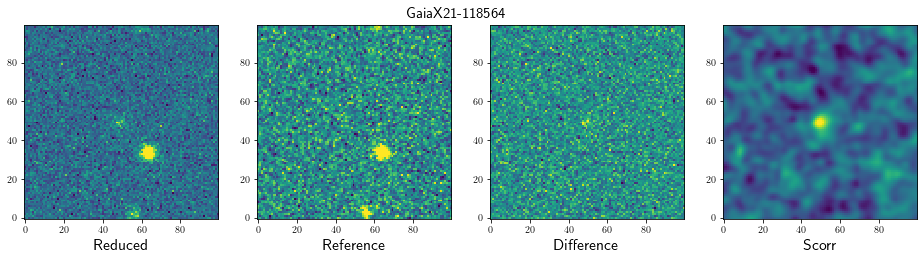

In [165]:
fourpanel(table=table4, num=35, gaia_id=r'GaiaX21-118564')

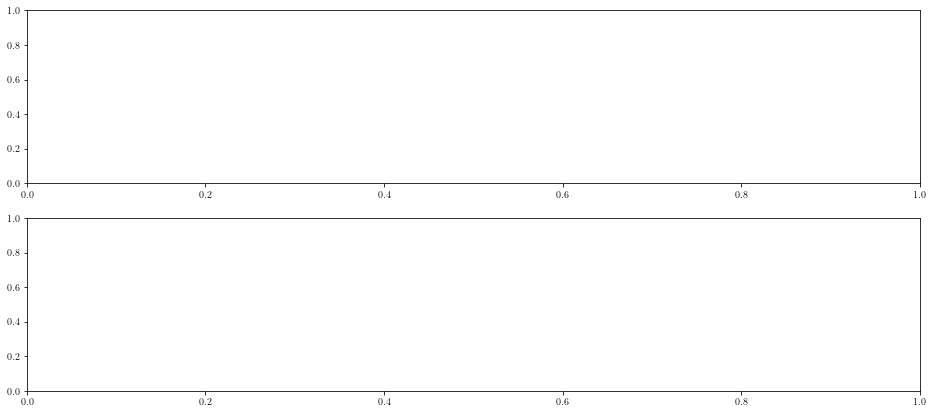

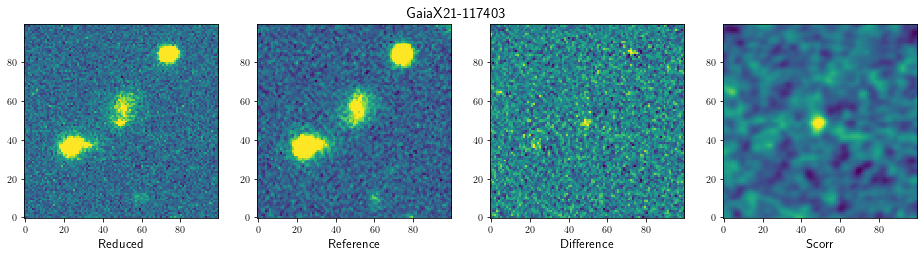

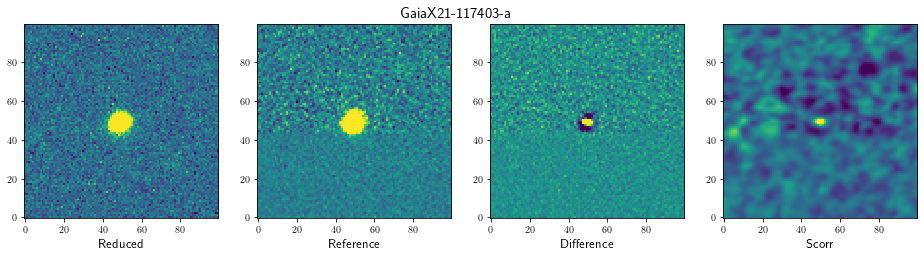

In [145]:
fig = plt.figure(figsize=(16,7))
ax1 = fig.add_subplot(2, 1, 1)
fourpanel(table=table2, num=62, gaia_id=r'GaiaX21-117403')
ax2 = fig.add_subplot(2, 1, 2)
fourpanel(table=table2, num=63, gaia_id=r'GaiaX21-117403-a')


In [134]:
# for i in range(0, len(table)):            
#     show_thumbs(table[i])